<a href="https://colab.research.google.com/github/kimchaeyoung-student/pdm04/blob/master/py-streamlit/diabetes_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EDA of Pima diabetes data
- Exploratory Data Analysis
- > https://medium.com/@soumen.atta/analyzing-pima-indians-diabetes-data-using-python-89a021b5f4eb

## 1. Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## 2. Data Collection

In [2]:
# Get the data from github
url = "https://github.com/Redwoods/Py/raw/master/pdm2020/my-note/py-pandas/data/diabetes.csv"
df = pd.read_csv(url)

In [3]:
df.shape

(768, 9)

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Ckeck & cleaning data
- Check the NaN or missing values
- Clean the null data

In [5]:
#CHECK FOR NULL VALUES
df.isnull().values.any(), df.isna().sum()

(False, Pregnancies                 0
 Glucose                     0
 BloodPressure               0
 SkinThickness               0
 Insulin                     0
 BMI                         0
 DiabetesPedigreeFunction    0
 Age                         0
 Outcome                     0
 dtype: int64)

In [6]:
# Drop unused columns, and drop rows with any missing values.
print(df.shape)
vars = df.columns
print(vars)
df = df[vars].dropna()
df.shape

(768, 9)
Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


(768, 9)

## 3. Explore Data

In [7]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 60.0 KB


### Check the balance of classes in the data through plot

False: non-diabetes 500
True: diabetes 268


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


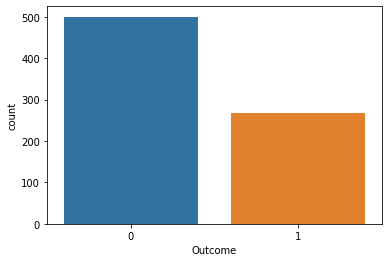

In [10]:
# Check the balance of the data through plot
classes=df.Outcome
ax=sns.countplot(classes, label='count')
nDB,DB=classes.value_counts()
print('False: non-diabetes',nDB)
print('True: diabetes',DB)

In [11]:
classes.value_counts(), type(classes)

(0    500
 1    268
 Name: Outcome, dtype: int64, pandas.core.series.Series)

***

### **Univariate plots:** 

* Histograms.
* Density Plots.
* Box and Whisker Plots.  

**Histograms** 

The distribution of each attribute can easily be visualized by ploting histograms. 

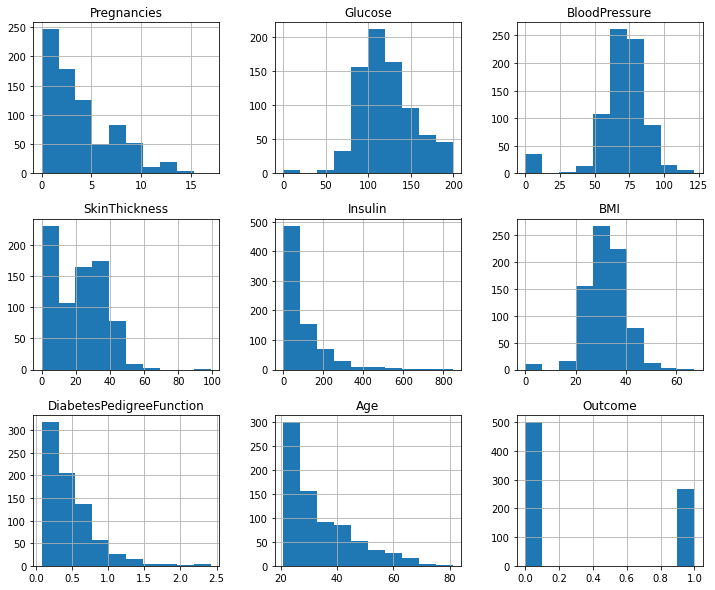

In [12]:
plt.rcParams['figure.figsize'] = [12, 10]; # set the figure size 

# Draw histograms for all attributes 
df.hist()
plt.show()

**Density Plots**

Another way to visualize the distribution of each attribute is density plots. 

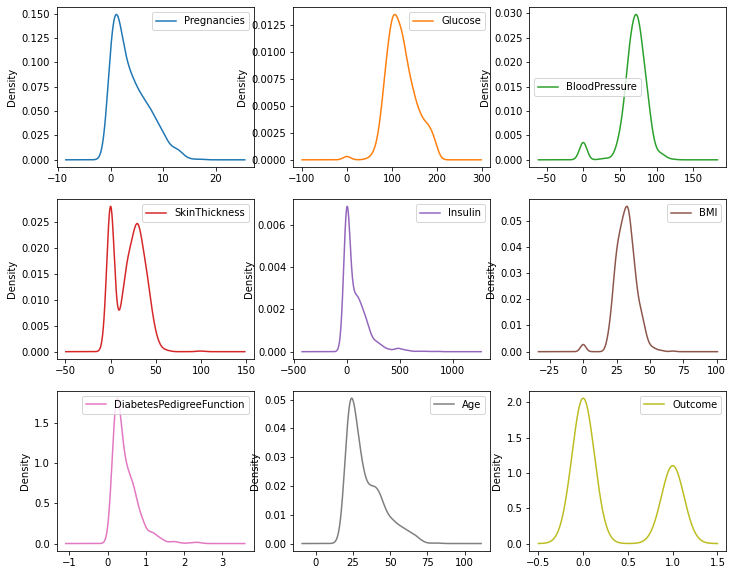

In [13]:
# Density plots for all attributes
df.plot(kind='density', subplots=True, layout=(3,3), sharex=False)
plt.show()

**Box and Whisker Plots** 

Box and Whisker Plots (or simply, boxplots) is used to visualize the distribution of each attribute.

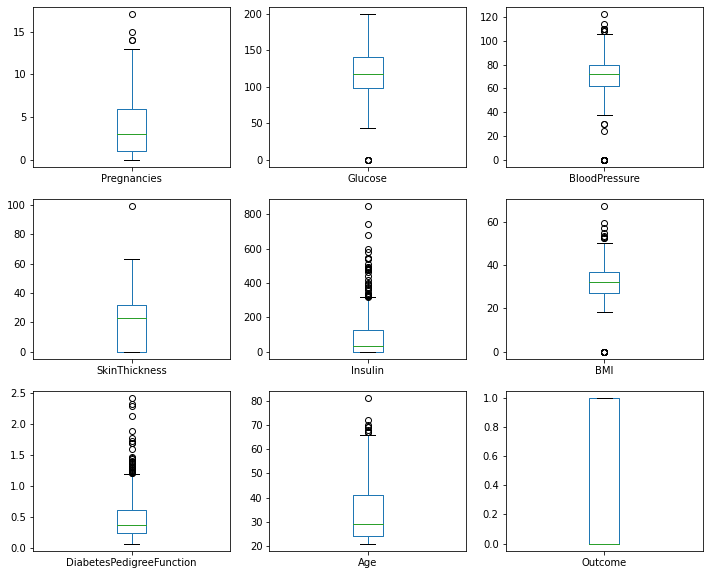

In [14]:
# Draw box and whisker plots for all attributes 
df.plot(kind= 'box', subplots=True, layout=(3,3), sharex=False, sharey=False)
plt.show()

***

## **Multivariate Plots:**

* Correlation Matrix Plot
* Scatter Plot Matrix 

### correlation plot

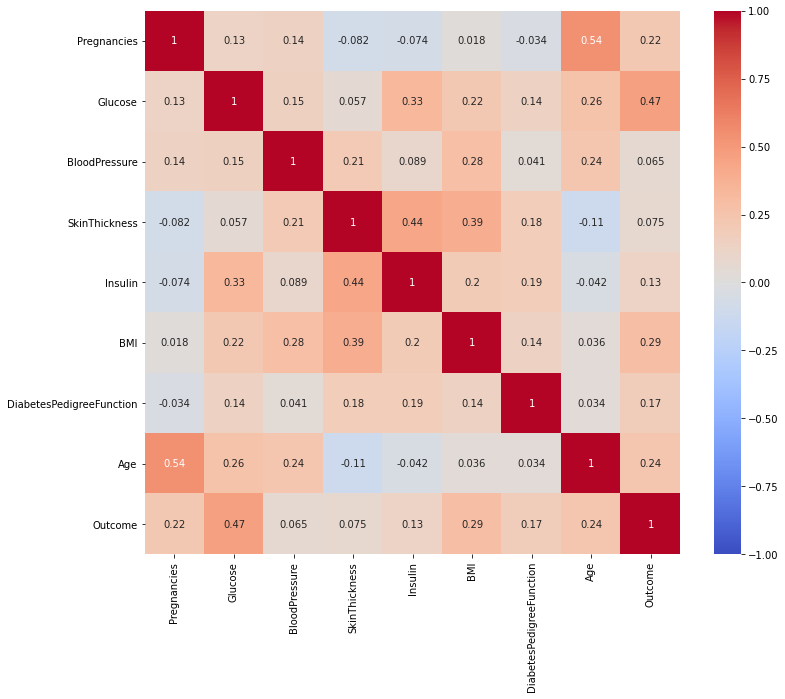

In [15]:
#correlation plot
cormat=df.corr()
plt.figure(figsize=(12,10))
g=sns.heatmap(df.corr(),annot=True,cmap='coolwarm', #cmap= "RdYlGn",
             vmin=-1, vmax=1)

### 상관성 분석 결과
* Age vs. Pregnancies : 0.54
* Glucose vs. Outcome : 0.47
* SkinThickness vs. Insulin : 0.44
* SkinThickness vs. BMI : 0.39

> ### **[DIY-1] 상관성이 높은 변수들에 대한 좀 더 자세한 시각화가 필요하다.**

**Scatter Plot Matrix**

A scatter plot shows the relationship between two variables as dots in two dimensions, one axis for each attribute.

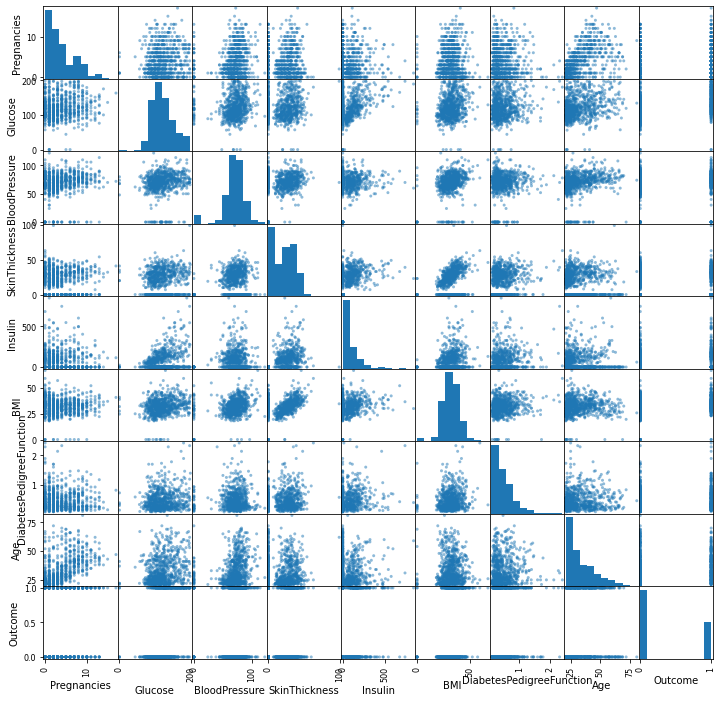

In [16]:
# Import required package 
from pandas.plotting import scatter_matrix
plt.rcParams['figure.figsize'] = [12, 12]

# Plotting Scatterplot Matrix
scatter_matrix(df)
plt.show()

In [17]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 80.0 KB


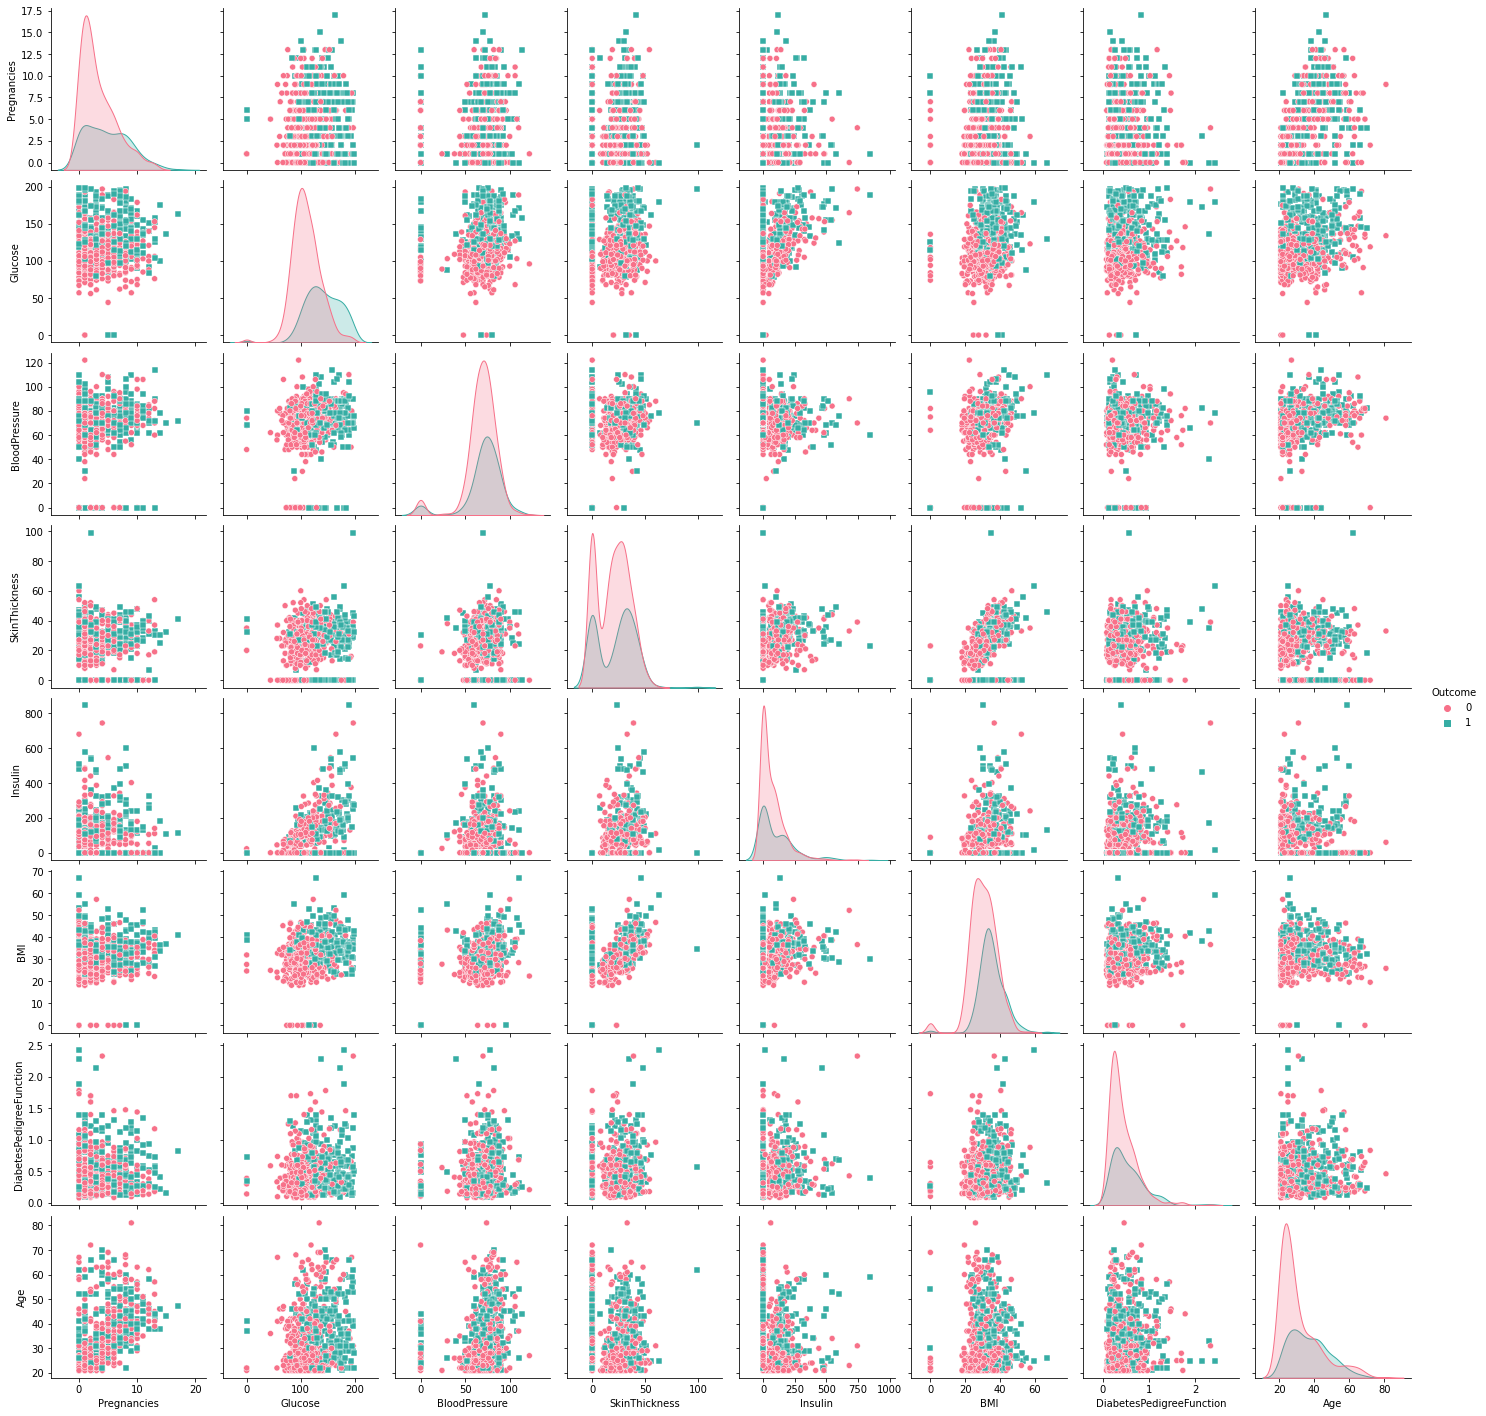

In [20]:
# Scatter plot
# import seaborn as sns
sns.pairplot(df, hue="Outcome", markers=["o", "s"],palette="husl")

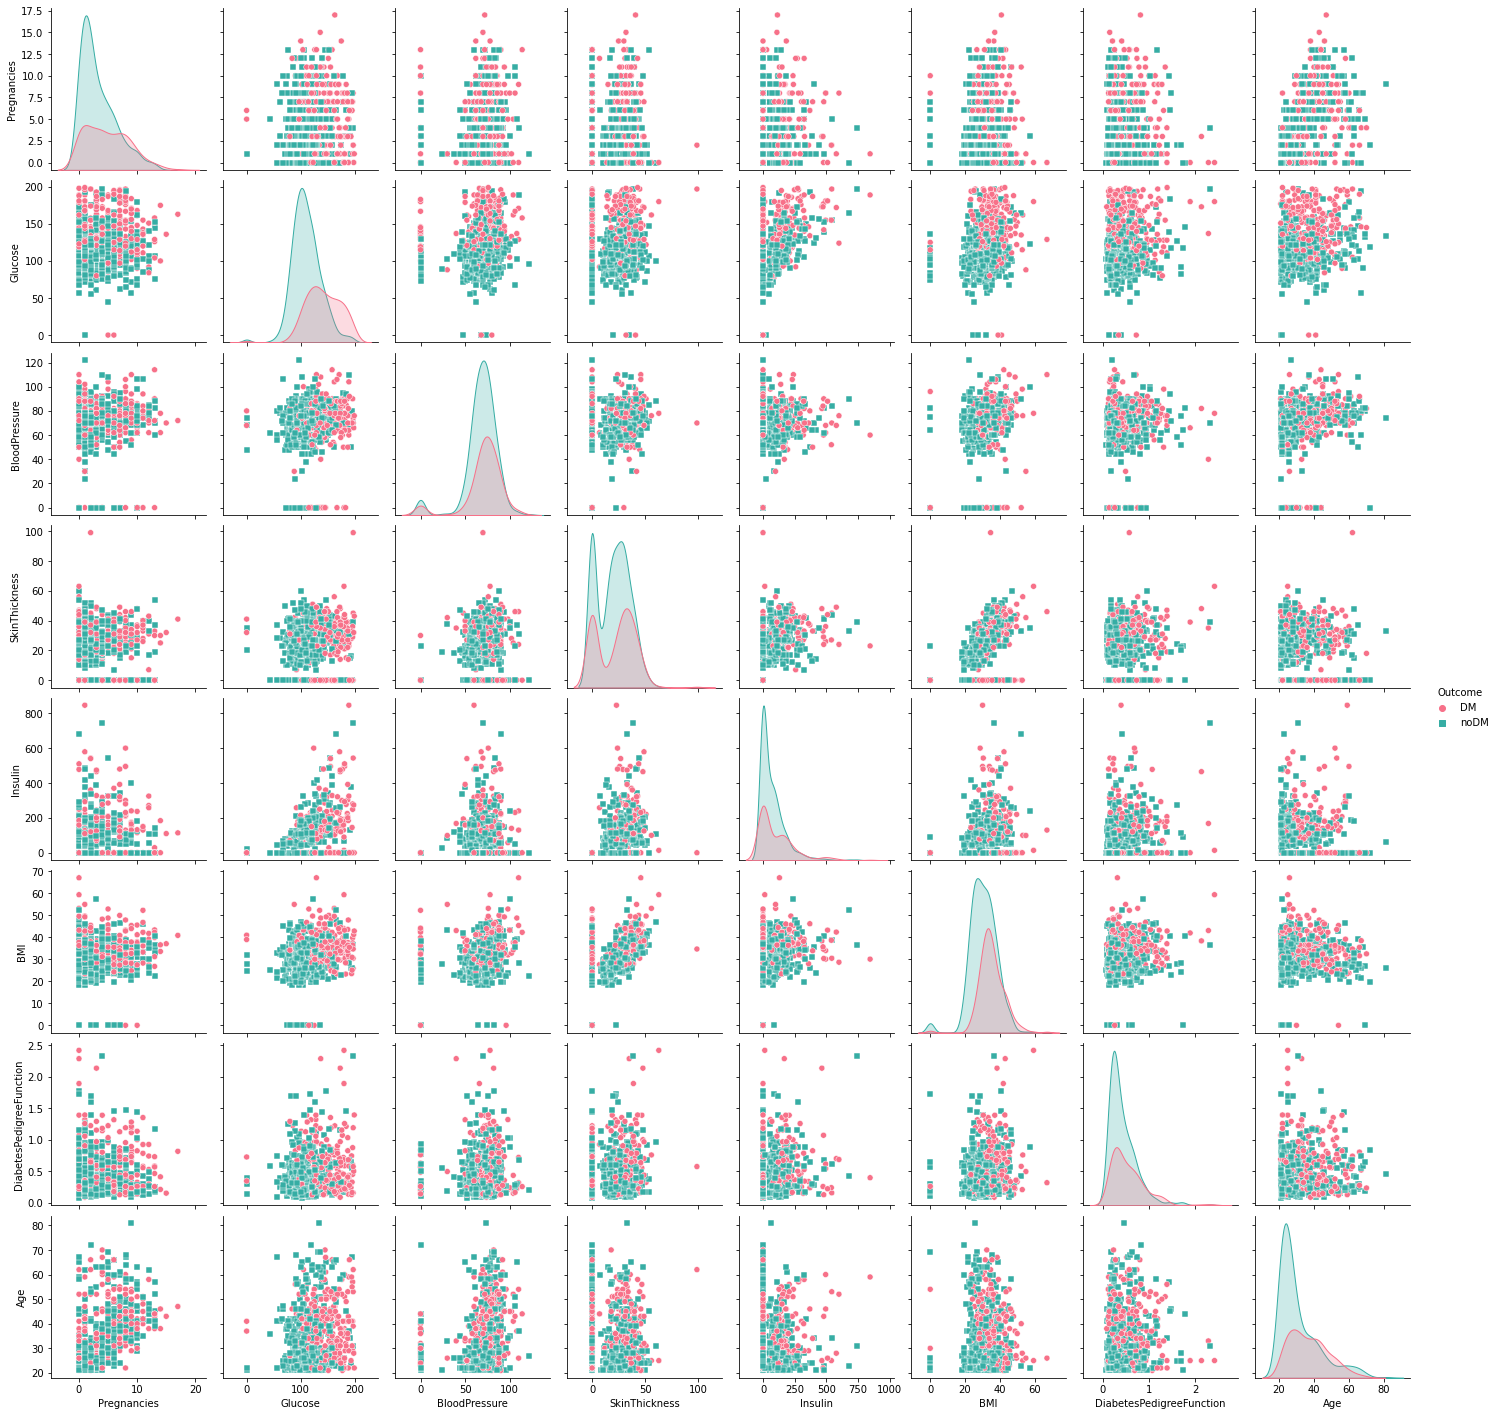

In [21]:
# Scatter plot
# import seaborn as sns
df_temp = df.copy()
df_temp['Outcome'] = df_temp['Outcome'].replace([0, 1],['noDM', 'DM'])
sns.pairplot(df_temp, hue='Outcome', markers=["o", "s"],palette="husl")

In [22]:
df_temp['Outcome'].value_counts()

noDM    500
DM      268
Name: Outcome, dtype: int64

In [23]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

### [DIY] 상관성이 높은 변수들에 대한 좀 더 자세한 시각화

#### 상관성이 높은 6개의 특성에 대한 산포도

In [24]:
high_corr = ['Pregnancies', 'Glucose', 'SkinThickness', 'Insulin', 'BMI','Age', 'Outcome']

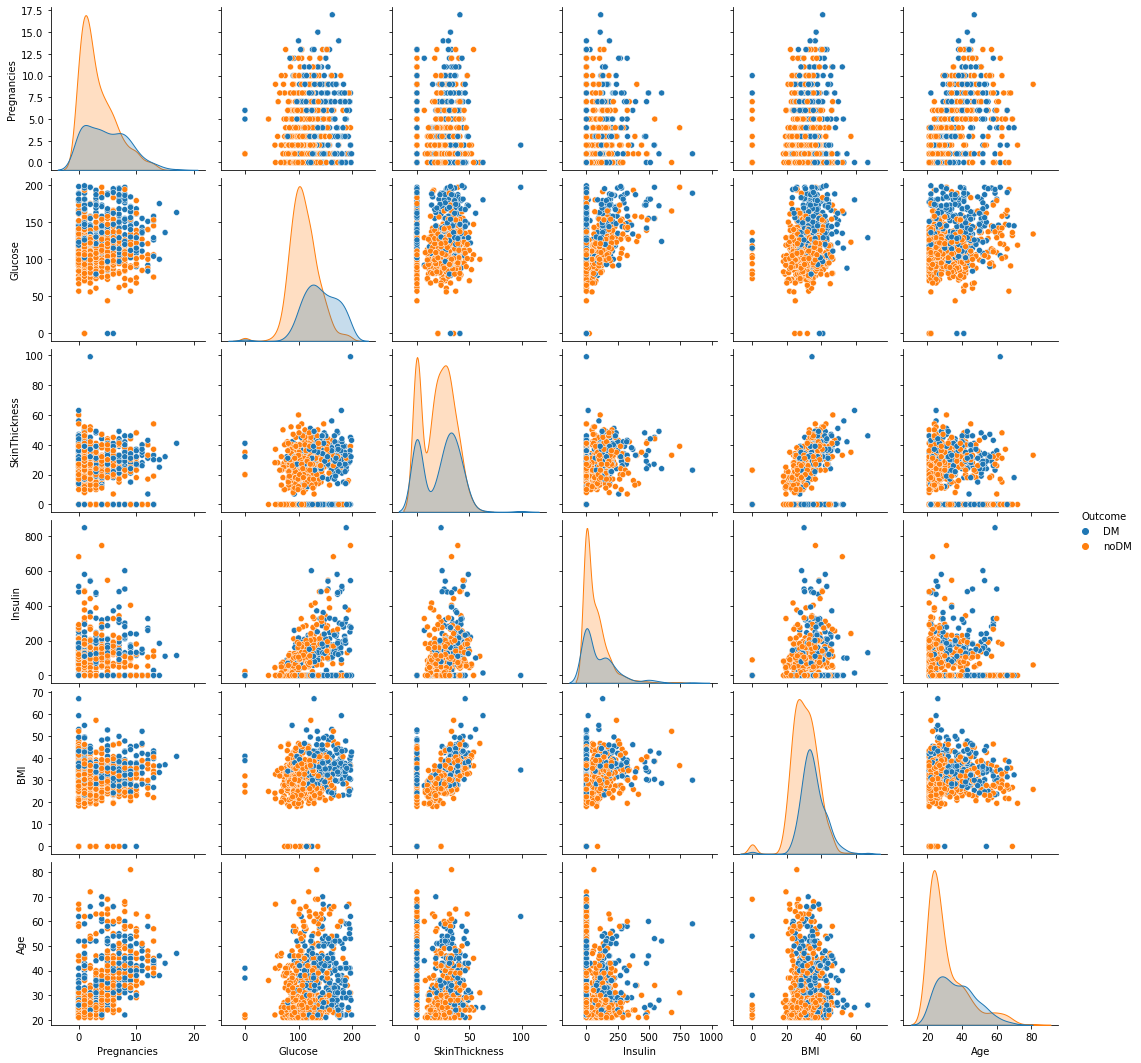

In [25]:
# Scatter plot
# import seaborn as sns
df_temp = df.copy()
df_temp['Outcome'] = df_temp['Outcome'].replace([0, 1],['noDM', 'DM'])
sns.pairplot(df_temp[high_corr], hue='Outcome') 

In [26]:
highest_corr = ['Pregnancies', 'Age', 'Outcome']

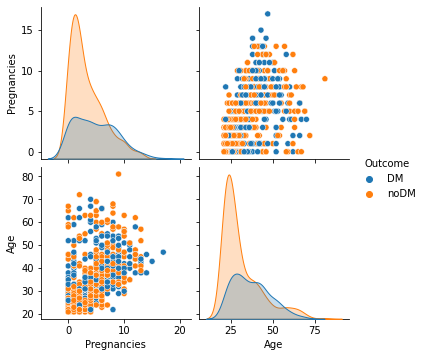

In [27]:
# Scatter plot
# import seaborn as sns
df_temp = df.copy()
df_temp['Outcome'] = df_temp['Outcome'].replace([0, 1],['noDM', 'DM'])
sns.pairplot(df_temp[highest_corr], hue='Outcome') 

***

## Advanced plots
### voiline plot by grouping data of columns
* Standarization of data (Normalization)

In [28]:
df_n=(df-df.mean())/df.std()
df_n

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.639530,0.847771,0.149543,0.906679,-0.692439,0.203880,0.468187,1.425067,1.365006
1,-0.844335,-1.122665,-0.160441,0.530556,-0.692439,-0.683976,-0.364823,-0.190548,-0.731643
2,1.233077,1.942458,-0.263769,-1.287373,-0.692439,-1.102537,0.604004,-0.105515,1.365006
3,-0.844335,-0.997558,-0.160441,0.154433,0.123221,-0.493721,-0.920163,-1.040871,-0.731643
4,-1.141108,0.503727,-1.503707,0.906679,0.765337,1.408828,5.481337,-0.020483,1.365006
...,...,...,...,...,...,...,...,...,...
763,1.826623,-0.622237,0.356200,1.721613,0.869464,0.115094,-0.908090,2.530487,-0.731643
764,-0.547562,0.034575,0.046215,0.405181,-0.692439,0.609757,-0.398023,-0.530677,-0.731643
765,0.342757,0.003299,0.149543,0.154433,0.279412,-0.734711,-0.684747,-0.275580,-0.731643
766,-0.844335,0.159683,-0.470426,-1.287373,-0.692439,-0.240048,-0.370859,1.169970,1.365006


In [29]:
# voiline plot by grouping data of columns
# Standarization of data (Normalization)
df_n=(df-df.mean())/df.std()
# data_std=(data-data.mean())/data.std()
y=df.Outcome
df2=pd.concat([y, df_n.iloc[:,0:8]], axis=1)
y.shape,df2.shape

((768,), (768, 9))

In [30]:
df3=pd.melt(df2,id_vars='Outcome', var_name='features',value_name='values')
df3.head(), df3.shape

(   Outcome     features    values
 0        1  Pregnancies  0.639530
 1        0  Pregnancies -0.844335
 2        1  Pregnancies  1.233077
 3        0  Pregnancies -0.844335
 4        1  Pregnancies -1.141108, (6144, 3))

### pandas melt() 
- https://rfriend.tistory.com/278

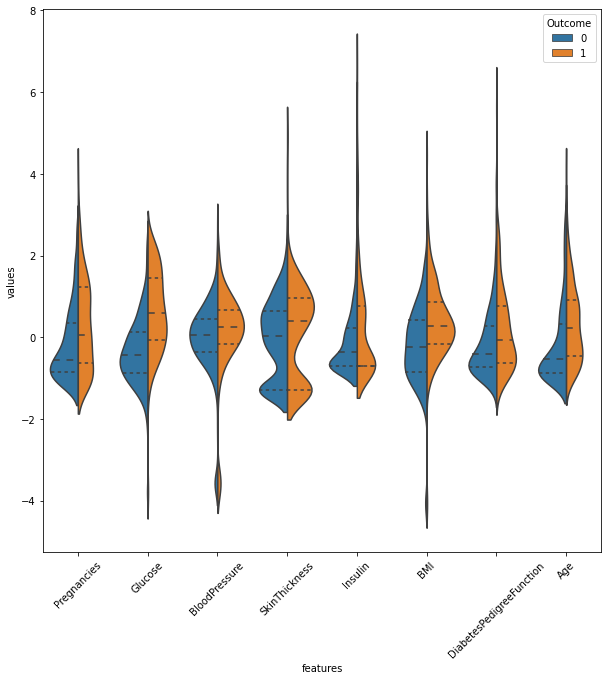

In [31]:
plt.figure(figsize=(10,10))
sns.violinplot(x='features', y='values', hue='Outcome', data=df3, split=True, inner='quart')
plt.xticks(rotation=45);

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 79.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 51.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 61.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 68.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 67.8% of the points cannot be placed; y

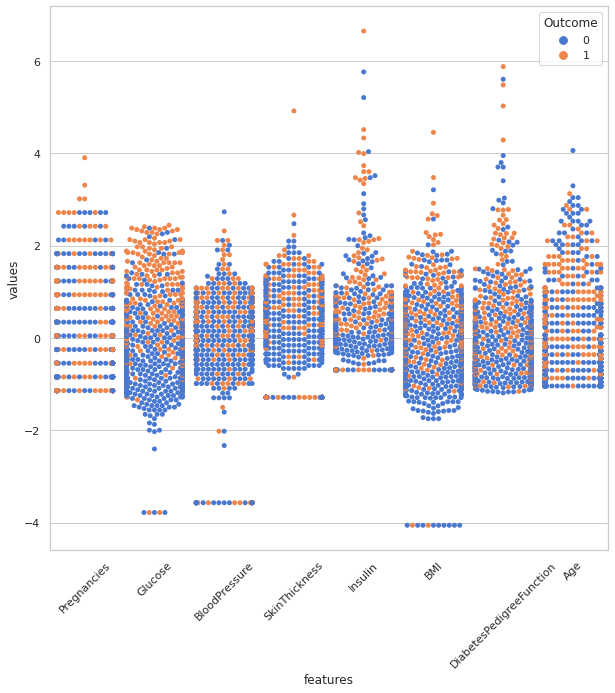

In [32]:
#customizing seaborn plot
sns.set(style='whitegrid', palette='muted')
# use df3 dataframe
# data=pd.concat([y, data_std.iloc[:,0:8]], axis=1)
# data=pd.melt(data,id_vars='Outcome', var_name='features',value_name='values')
plt.figure(figsize=(10,10))
sns.swarmplot(x='features', y='values', hue='Outcome', data=df3)
plt.xticks(rotation=45);